<a href="https://colab.research.google.com/github/BasmaHamud/Data-Science/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import mnist, fashion_mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
#Goal is now to attack the digit recognition problem again then go after another mnist problem
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
#Again we'll build up one layer at a time
cnn = models.Sequential()

#The task is the same, so we are maintaining the same input_shape for layer 1
#But this time it is something special, a 2DConv layer - a layer performing a spatial
#convolution over images.  For our purposes we can think of these layers as "summary" layers
#for the distinct features (edges, eyes, odd shapes, etc.) in an image.
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Output of (26, 26, 32) 26 due to 3x3 skip 32 filters
#The problem though with these summary layers' output is that they become extremely
#sensitive to the position of the features that the convolution layer picks out.
#To address this we "downsample" this information: average over the specific
#regions that were most likely to have a feature present
cnn.add(layers.MaxPooling2D((2, 2))) #Downsamples the feature map by factor of 2
cnn.add(layers.Conv2D(64, (3, 3), activation='relu')) #Output of (11, 11, 64) 11 due to 3x3 skip 64 filters
cnn.add(layers.MaxPooling2D((2, 2))) #Downsamples by factor of 2
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
#We'll then flatten for a layer to combine some of our derived features
cnn.add(layers.Flatten()) #Output 3x3x64
#And bring ourselves down to 10 outputs (the digits 0-9)
cnn.add(layers.Dense(64, activation = 'relu'))
cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
#Now we perform the same preprocessing as before
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(train_images, train_labels, epochs = 5, batch_size = 64)

test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 57s 955us/step - loss: 0.1859 - accuracy: 0.9442
Epoch 2/5
60000/60000 [==============================] - 58s 959us/step - loss: 0.0492 - accuracy: 0.9847
Epoch 3/5
60000/60000 [==============================] - 57s 943us/step - loss: 0.0350 - accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 56s 937us/step - loss: 0.0278 - accuracy: 0.9909
Epoch 5/5
10000/10000 [==============================] - 3s 340us/step
0.9901000261306763


So we see that all of this heavy lifting gave us a reasonable (relative) improvement of ~50% (recalling we were already pushing the edge of performance.)  Why does this approach actually give us such an improvement?  To see why let's discuss the exactly what Conv2D and MaxPooling2D do.

Convolutional layers have a property that allows them to learn the local features or patterns of their inputs (contrast this with FC layers which learned global features.)  We call this behavior translation invariant (a valuable property: a cat sitting next to me is still a cat if I pick it up and move it a few feet to my right) and say multiple layers learn the spatial hierarchy of an input.

These conv layers operate on 3-Tensors (height, width, depth) - remember the RGB pixels we talked about yesterday.  The interpretation of the axes can change after operation - depending on which axis the layer acts on.

As mentioned before, we pick up a little too much detail with conv and so we want to start downsampling that as quickly as possible.  Specifically, the max pooling layer accomplishes this by outputting the max value of each channel for a given input. 

In [ ]:
#Warm up exercise: determine the relationship between an input of (x, y) and the output
#of (x', y') for a) 3x3 skip and b) 5x5 skip (don't just look up the formula....)




#As an exercise to you guys, follow the link below to see a fully connected implementation
#of a nn for the fashion-mnist dataset.  Feel free to follow their example, but then
#expand on it first by directly copying our approach above and then by seeing
#if you can expand on the approach (different optimizers, nn archiecture, etc.)

#Winner gets a $5 starbucks gift card

#https://www.tensorflow.org/tutorials/keras/classification

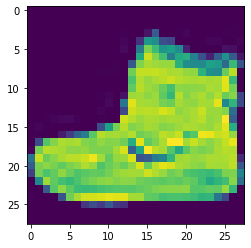

In [ ]:
#directly copying above approach on new dataset
#going to switch optimizer to 'sgd'
#from looking online, this gradient decent will update the gradeients more frequelent (each data point instead data set) 
#could be noisey with not 'mini batch' (few samples) or momentum

import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import mnist, fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#print a test image... ankle boot
plt.imshow(train_images[0])
plt.show()

In [ ]:
model=models.Sequential()
#convulution layer will have 32 filters each size 3x3. specified input shape with 28x28 dimension
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Output of (26, 26, 32) 26 due to 3x3 skip 32 filters
#one more layer having 64 filters 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #no need to copy input shape

model.add(layers.MaxPooling2D((2, 2)))##? still a little unclear on maxpooling

model.add(layers.Flatten()) #reshape function to make 3d  into linear --- 
model.add(layers.Dense(10, activation = 'softmax'))#dense layer w/ 10 neurons to predict output for 10 classes
#add drop out
# different dense 
model.summary()

#how to reduce params? 110k examples? is this over fiting??

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________


In [ ]:


#perform the same preprocessing as before
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255  # makes a float value between 0 and 1

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
#model ready to compile and train 
# check different 'loss' options


model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 123s 2ms/step - loss: 0.7253 - accuracy: 0.7436
Epoch 2/5
60000/60000 [==============================] - 123s 2ms/step - loss: 0.5429 - accuracy: 0.8052
Epoch 3/5
60000/60000 [==============================] - 124s 2ms/step - loss: 0.4749 - accuracy: 0.8319
Epoch 4/5
60000/60000 [==============================] - 123s 2ms/step - loss: 0.4348 - accuracy: 0.8468
Epoch 5/5
10000/10000 [==============================] - 6s 591us/step
0.8565999865531921
